# make Custom dataset

In [1]:
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
#%matplotlib inline
cwd = os.getcwd()

In [2]:
directory_path ='data/celeb_images'

categories = ['Amber Heard', 'Alessandra Ambrosio', 'Amanda Seyfried']

imgsize = [128, 128]
use_gray = 0
data_name = 'custom_data'


# rgb2gray function

In [3]:
def rgb2gray(rgb):
    if len(rgb.shape) == 3:
        return np.dot(rgb,[0.299,0.587,0.114])
    else:
        return rgb

# Load images

In [6]:
nclass = len(categories)
valid_exts = ['.jpg', '.gif', '.png', '.tga', '.jpeg']
imgcnt = 0

for i, relpath in enumerate(categories):
    path = os.path.join(cwd, directory_path, relpath)
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        
        try:
            currimg = imread(fullpath)

            if currimg.shape[2] == 4: # rgby
                currimg = currimg[:,:,0:3]

            if use_gray:
                grayimg = rgb2gray(currimg)
            else:
                grayimg = currimg

            #Resize
            graysmall = imresize(grayimg, [imgsize[0], imgsize[1]])/255.
            grayvec = np.reshape(graysmall, (1,-1))
            print(grayvec.shape[1])
            # Save
            curr_label = np.eye(nclass, nclass)[i:i+1,:]

            if imgcnt:
                totalimg = np.concatenate((totalimg, grayvec), axis = 0)
                totallabel = np.concatenate((totallabel, curr_label), axis = 0)
            else:
                totalimg = grayvec
                totallabel = curr_label
            imgcnt = imgcnt + 1
        except:
            "error during reading image"

c:\users\jmson\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
c:\users\jmson\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
4915

49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
49152
4915

# Divide into Training and Test set

In [7]:
imgcnt

2345

In [8]:
randidx = np.random.randint(imgcnt, size = imgcnt)
trainidx = randidx[0:int(4*imgcnt/5)]
testidx = randidx[int(4*imgcnt/5):imgcnt]

train_img = totalimg[trainidx]
test_img = totalimg[testidx]

train_label = totallabel[trainidx]
test_label = totallabel[testidx]

data_name="custom_celeb_face"

In [9]:
randidx, trainidx

(array([ 560, 1640,  391, ..., 1658, 1838, 2184]),
 array([ 560, 1640,  391, ...,  855,  453, 1333]))

# Save to NPZ

In [10]:
savepath = cwd + "/data/" + data_name +".npz"
np.savez(savepath, trainimg=train_img, trainlabel = train_label, testimg = test_img, testlabel = test_label, use_gray = use_gray, categories=categories)

# Load NPZ

In [11]:
cwd = os.getcwd()
loadpath = cwd + "/data/"+ data_name + ".npz"
loaded = np.load(loadpath)
print(loaded.files)

['trainimg', 'trainlabel', 'testimg', 'testlabel', 'use_gray', 'categories']


In [12]:
load_train_img = loaded['trainimg']
load_test_img = loaded['testimg']
load_train_label = loaded['trainlabel']
load_test_label = loaded['testlabel']
load_categories = loaded['categories']

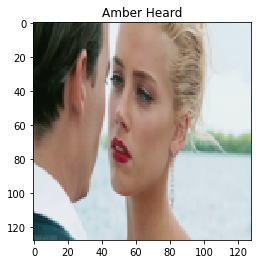

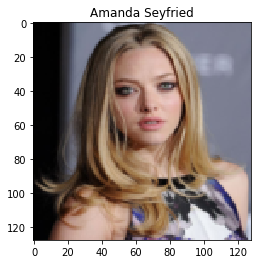

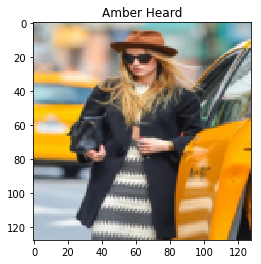

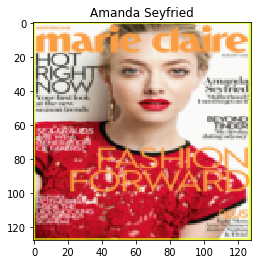

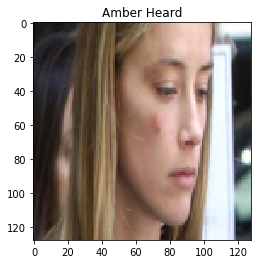

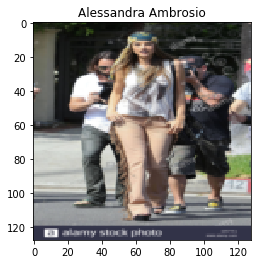

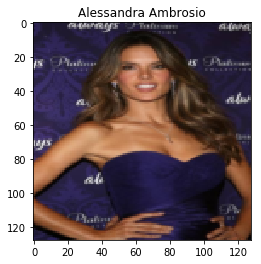

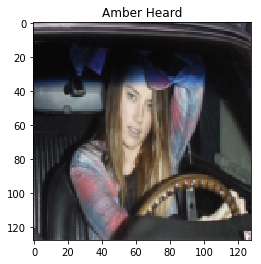

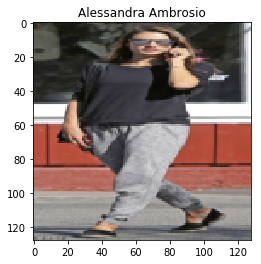

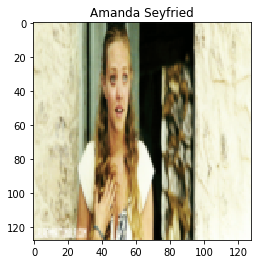

In [14]:
for i in range(10):
    curlabel_onehot = load_train_label[i]
    curlabel = np.argmax(curlabel_onehot)
    if use_gray:
        curimg = np.reshape(load_train_img[i], (imgsize[0],-1))
        plt.imshow(curimg, cmap="gray")
    else:
        curimg = np.reshape(load_train_img[i], (imgsize[0],imgsize[1],-1))
        plt.imshow(curimg)
    
    plt.title(categories[curlabel])
    plt.show()